In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_list=pd.read_csv('/content/drive/MyDrive/bareily_hourly.csv')
df=pd.DataFrame(df_list)

In [ ]:
df.head()

,Unnamed: 0,Smart_Meter,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Date,Year,Month,...,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time,Time_Category
0,0,BR02,2019-07-10 00:00:00,0.405,242.099,1.7680,50.0240,2019-07-10,2019,7,...,191,2,2,0,0,3,00:00:00,Summer,Night,Midnight
1,1,BR02,2019-07-10 01:00:00,0.446,244.241,1.9050,50.0470,2019-07-10,2019,7,...,191,2,2,1,0,3,01:00:00,Summer,Night,Midnight
2,2,BR02,2019-07-10 02:00:00,0.447,246.532,1.8895,50.0355,2019-07-10,2019,7,...,191,2,2,2,0,3,02:00:00,Summer,Night,Midnight
3,3,BR02,2019-07-10 03:00:00,0.450,248.409,1.8815,50.0585,2019-07-10,2019,7,...,191,2,2,3,0,3,03:00:00,Summer,Night,Midnight
4,4,BR02,2019-07-10 04:00:00,0.454,249.703,1.8870,50.0370,2019-07-10,2019,7,...,191,2,2,4,0,3,04:00:00,Summer,Night,Midnight


In [ ]:
df.columns

Index(['Unnamed: 0', 'Smart_Meter', 'Timestamp',
       'Electricity_consumption(kWh)', 'Avg_Voltage(Volt)', 'Avg_Current(Amp)',
       'Freq(Hz)', 'Date', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Dayofweek', 'Weekday', 'Hour', 'Minute', 'Quarter', 'TIME', 'Season',
       'Time', 'Time_Category'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763320 entries, 0 to 763319
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    763320 non-null  int64  
 1   Smart_Meter                   763320 non-null  object 
 2   Timestamp                     763320 non-null  object 
 3   Electricity_consumption(kWh)  763320 non-null  float64
 4   Avg_Voltage(Volt)             763320 non-null  float64
 5   Avg_Current(Amp)              763320 non-null  float64
 6   Freq(Hz)                      763320 non-null  float64
 7   Date                          763320 non-null  object 
 8   Year                          763320 non-null  int64  
 9   Month                         763320 non-null  int64  
 10  Week                          763320 non-null  int64  
 11  Day                           763320 non-null  int64  
 12  Dayofyear                     763320 non-nul

In [ ]:
import pandas as pd

# Assuming your existing DataFrame is named df
# Grouping by 'Timestamp' and summing 'Electricity_consumption(kWh)'
grouped_df = df.groupby('Timestamp')['Electricity_consumption(kWh)'].sum().reset_index()

# Creating a new DataFrame with two columns
new_df = pd.DataFrame({
    'Timestamp': grouped_df['Timestamp'],
    'Electricity_consumption': grouped_df['Electricity_consumption(kWh)']
})

# Displaying the new DataFrame
print(new_df)


                 Timestamp  Electricity_consumption
0      2019-05-09 00:00:00                    0.599
1      2019-05-09 01:00:00                    0.601
2      2019-05-09 02:00:00                    0.611
3      2019-05-09 03:00:00                    0.619
4      2019-05-09 04:00:00                    0.625
...                    ...                      ...
21763  2021-10-31 19:00:00                    6.732
21764  2021-10-31 20:00:00                    6.719
21765  2021-10-31 21:00:00                    6.556
21766  2021-10-31 22:00:00                    6.918
21767  2021-10-31 23:00:00                    6.646

[21768 rows x 2 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming your existing DataFrame is named df
# Selecting only the 'Timestamp' and 'Electricity_consumption(kWh)' columns
data = df[['Timestamp', 'Electricity_consumption(kWh)']].copy()

# Setting 'Timestamp' column as the index
data.set_index('Timestamp', inplace=True)

# Resampling data to a specific frequency if needed (e.g., hourly, daily)
# data = data.resample('H').sum()  # Change 'H' to your desired frequency

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Setting sequence length
sequence_length = 20  # Adjust as needed

# Creating sequences
X, y = create_sequences(scaled_data, sequence_length)

# Splitting data into training and testing sets (e.g., 80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshaping data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)




Epoch 1/10
19083/19083 [==============================] - 424s 22ms/step - loss: 0.0018
Epoch 2/10
19083/19083 [==============================] - 423s 22ms/step - loss: 0.0017
Epoch 3/10
19083/19083 [==============================] - 423s 22ms/step - loss: 0.0017
Epoch 4/10
19083/19083 [==============================] - 425s 22ms/step - loss: 0.0017
Epoch 5/10
19083/19083 [==============================] - 427s 22ms/step - loss: 0.0017
Epoch 6/10
19083/19083 [==============================] - 428s 22ms/step - loss: 0.0017
Epoch 7/10
19083/19083 [==============================] - 429s 22ms/step - loss: 0.0017
Epoch 8/10
19083/19083 [==============================] - 428s 22ms/step - loss: 0.0017
Epoch 9/10
19083/19083 [==============================] - 440s 23ms/step - loss: 0.0017
Epoch 10/10
19083/19083 [==============================] - 429s 22ms/step - loss: 0.0016


In [ ]:
# Evaluating the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Loss: {train_loss}')

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Loss: {test_loss}')

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transforming the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Printing the shape of predictions
print(f'Train Predictions Shape: {train_predictions.shape}')
print(f'Test Predictions Shape: {test_predictions.shape}')

Training Loss: 0.0016374740516766906
Testing Loss: 0.0025291598867625
4771/4771 [==============================] - 37s 8ms/step
Train Predictions Shape: (610640, 1)
Test Predictions Shape: (152660, 1)


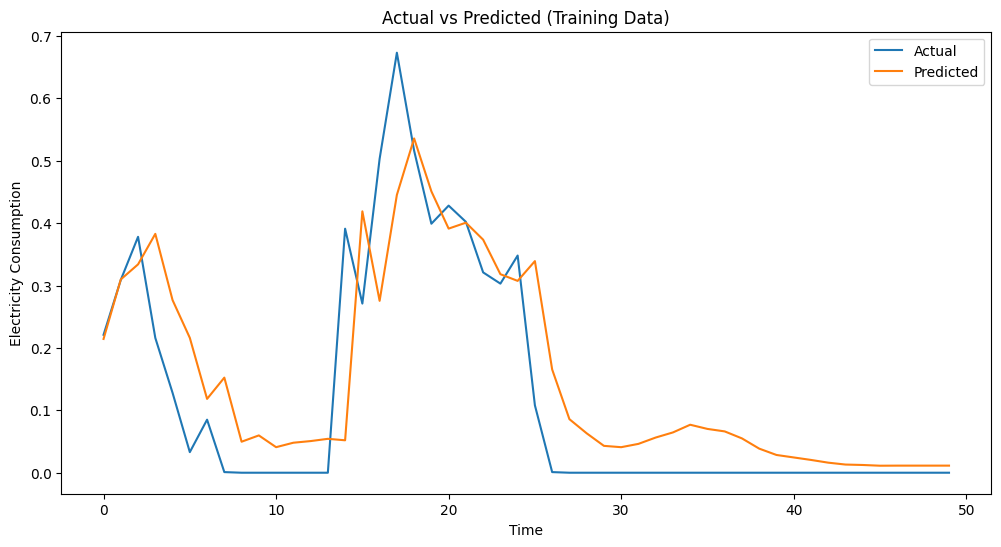

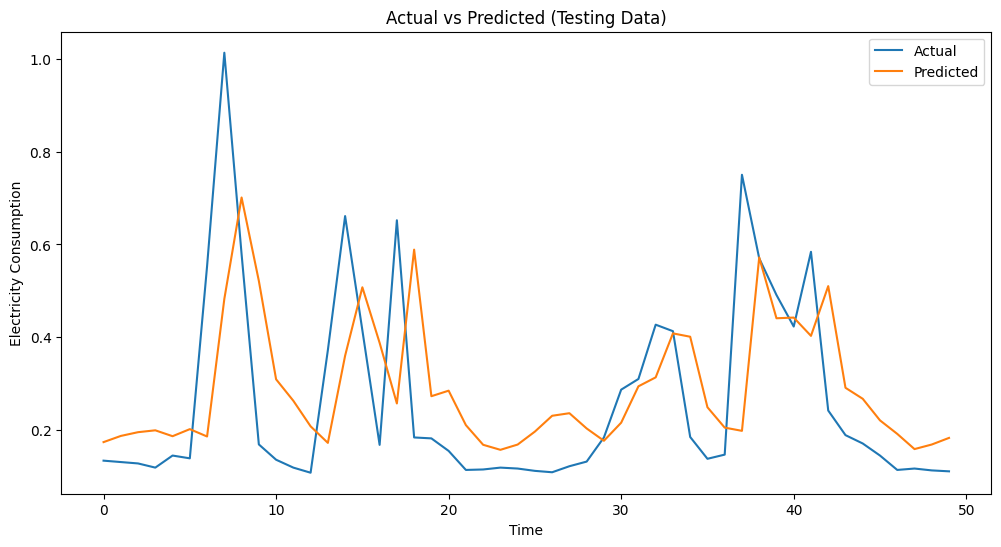

In [ ]:
# Define the start and end index of the interval
start_index = 0
end_index = 50  # Adjust as needed

# Plotting actual vs predicted for training data (small interval)
plt.figure(figsize=(12, 6))
plt.plot(y_train_actual[start_index:end_index], label='Actual')
plt.plot(train_predictions[start_index:end_index], label='Predicted')
plt.title('Actual vs Predicted (Training Data)')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# Plotting actual vs predicted for testing data (small interval)
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[start_index:end_index], label='Actual')
plt.plot(test_predictions[start_index:end_index], label='Predicted')
plt.title('Actual vs Predicted (Testing Data)')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_actual, train_predictions)
mae_test = mean_absolute_error(y_test_actual, test_predictions)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_actual, train_predictions)
mse_test = mean_squared_error(y_test_actual, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train_actual, train_predictions, squared=False)
rmse_test = mean_squared_error(y_test_actual, test_predictions, squared=False)

# Calculate R^2 (coefficient of determination)
r2_train = r2_score(y_train_actual, train_predictions)
r2_test = r2_score(y_test_actual, test_predictions)

# Print the metrics
print("Mean Absolute Error (MAE):")
print(f"  Training: {mae_train:.2f}")
print(f"  Testing: {mae_test:.2f}\n")

print("Mean Squared Error (MSE):")
print(f"  Training: {mse_train:.2f}")
print(f"  Testing: {mse_test:.2f}\n")

print("Root Mean Squared Error (RMSE):")
print(f"  Training: {rmse_train:.2f}")
print(f"  Testing: {rmse_test:.2f}\n")

print("Coefficient of determination (R^2):")
print(f"  Training: {r2_train:.2f}")
print(f"  Testing: {r2_test:.2f}")


Mean Absolute Error (MAE):
  Training: 0.11
  Testing: 0.15

Mean Squared Error (MSE):
  Training: 0.05
  Testing: 0.08

Root Mean Squared Error (RMSE):
  Training: 0.22
  Testing: 0.28

Coefficient of determination (R^2):
  Training: 0.69
  Testing: 0.67
